In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Titanic Dataset/train.csv').dropna(subset=['Age'])
df.head()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as ols

model = ols.ols('Age ~ Pclass', data=df).fit()

anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

In [15]:
import scipy.stats as stats

for class1, class2 in [(1, 2), (2, 3), (3, 1)]:
    print(f"Comparing Class {class1} and Class {class2}")
    print(stats.ttest_ind(df[df['Pclass'] == class1]['Age'],df[df['Pclass'] == class2]['Age']))

Comparing Class 1 and Class 2
TtestResult(statistic=5.485187676773201, pvalue=7.835568991415144e-08, df=357.0)
Comparing Class 2 and Class 3
TtestResult(statistic=3.927800191020872, pvalue=9.715078600777852e-05, df=526.0)
Comparing Class 3 and Class 1
TtestResult(statistic=-10.849122601201033, pvalue=6.134470007830625e-25, df=539.0)


In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

turkey = pairwise_tukeyhsd(endog=df['Age'], groups=df['Pclass'], alpha=0.05)
print(f"Turkey HSD {turkey}")

Turkey HSD  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2  -8.3558    0.0 -11.7041  -5.0075   True
     1      3 -13.0928    0.0 -15.9622 -10.2234   True
     2      3   -4.737 0.0005  -7.6763  -1.7977   True
------------------------------------------------------


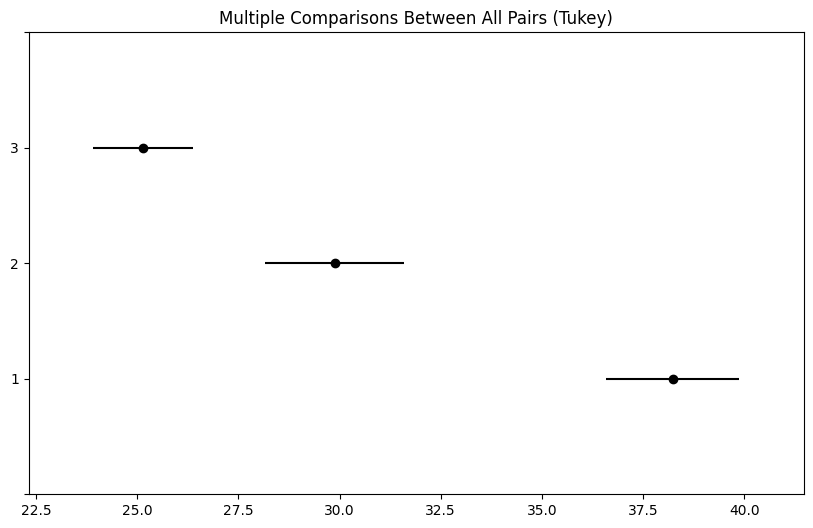

,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,1,2,-8.3558,0.0,-11.7041,-5.0075,True
2,1,3,-13.0928,0.0,-15.9622,-10.2234,True
3,2,3,-4.737,0.0005,-7.6763,-1.7977,True


In [23]:
turkey.plot_simultaneous()
plt.vlines(x=49.57,ymin = -0.5,ymax=4.5 ,color='red')
plt.show()

pd.DataFrame(turkey.summary())